# 🧠 Spotify Genre Tagger
Lightweight zero-shot classifier using DistilBERT to assign genres to lyrics.

## 📦 Install Required Packages

In [4]:
!pip install transformers datasets scikit-learn pandas matplotlib seaborn

## 📥 Import Libraries

In [7]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt


## 📂 Load Dataset

In [9]:

data = {
    "text": [
        "Baby you're a firework, come on let your colors burst",
        "Rolling down the street, smoking indo, sipping on gin and juice",
        "Thunderstruck, yeah yeah yeah, thunderstruck",
        "I got my red dress on tonight, dancing in the dark",
        "My momma don't like you and she likes everyone",
        "I got 99 problems but a b ain't one",
        "We will, we will rock you",
        "Despacito, quiero respirar tu cuello despacito"
    ],
    "genre": ["Pop", "Hip-Hop", "Rock", "Pop", "Pop", "Hip-Hop", "Rock", "Latin"]
}
df = pd.DataFrame(data)
df.head()


,text,genre
0,"Baby you're a firework, come on let your color...",Pop
1,"Rolling down the street, smoking indo, sipping...",Hip-Hop
2,"Thunderstruck, yeah yeah yeah, thunderstruck",Rock
3,"I got my red dress on tonight, dancing in the ...",Pop
4,My momma don't like you and she likes everyone,Pop


## ✂️ Train-Test Split

In [13]:

X = df['text']
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## 🤖 Zero-Shot Classification (Stable Model)

In [16]:

classifier = pipeline("zero-shot-classification", model="typeform/distilbert-base-uncased-mnli", device=-1)

labels = list(df['genre'].unique())
predicted = []
for text in X_test[:3]:  # Limit for speed
    result = classifier(text, candidate_labels=labels)
    predicted.append(result['labels'][0])


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecate

## 📊 Evaluation

Classification Report (3 Samples):
              precision    recall  f1-score   support

     Hip-Hop       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



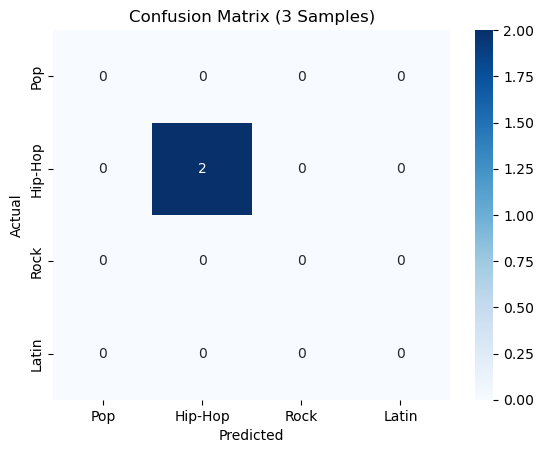

In [18]:

print("Classification Report (3 Samples):")
print(classification_report(y_test[:3], predicted))

cm = confusion_matrix(y_test[:3], predicted, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (3 Samples)")
plt.show()
